# **Import Libraries and modules**

In [65]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

2019-06-14 17:02:49.456274


In [66]:
import numpy as np
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, concatenate, Input, Conv2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-14 17:02:49.473341


### Load pre-shuffled MNIST data into train and test sets

In [67]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

2019-06-14 17:02:49.814434


(60000, 28, 28)
2019-06-14 17:02:49.845273


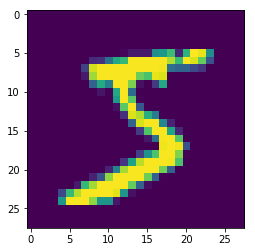

In [68]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [69]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-14 17:02:49.990989


In [70]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-14 17:02:50.151845


In [71]:
y_train[:10]
print(datetime.datetime.now())

2019-06-14 17:02:50.159882


In [72]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-14 17:02:50.174860


In [73]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-14 17:02:50.182217


In [74]:
## MAIN BLOCK

from keras.layers import Activation

#INPUT LAYER
x1 = Input(shape=(28, 28, 1))
x2 = Conv2D(64, 3, 3,  activation='relu', border_mode='same')(x1)
x1_x2_merge = concatenate([x1, x2])
x3 = Conv2D(64, 3, 3,  activation='relu', border_mode='same')(x1_x2_merge)
x1_x2_x3_merge = concatenate([x1, x2, x3])
x4 = MaxPooling2D(pool_size=(2, 2))(x1_x2_x3_merge)
x5 = Conv2D(64, 3, 3,  activation='relu', border_mode='same')(x4)
x4_x5_merge = concatenate([x4, x5])
x6 = Conv2D(64, 3, 3,  activation='relu', border_mode='same')(x4_x5_merge)
x4_x5_x6_merge = concatenate([x4, x5, x6])
x7 = Conv2D(64, 3, 3,  activation='relu', border_mode='same')(x4_x5_x6_merge)
x5_x6_x7_merge = concatenate([x5, x6, x7])
x8 =  MaxPooling2D(pool_size=(2, 2))(x5_x6_x7_merge)
x9 = Conv2D(64, 3, 3,  activation='relu', border_mode='same')(x8)
x8_x9_merge = concatenate([x8, x9])
x10 = Conv2D(64, 3, 3,  activation='relu', border_mode='same')(x8_x9_merge)
x8_x9_x10_merge = concatenate([x8, x9, x10])
x11 = Conv2D(64, 3, 3,  activation='relu', border_mode='same')(x8_x9_x10_merge)
#OUTPUT LAYER
x12 = Conv2D(10, 1, activation='relu')(x11)                                  
x12 = Conv2D(10, 7)(x12)
x12 = Flatten()(x12)
predictions = Activation('softmax')(x12)
model = Model(inputs=x1, outputs=predictions)

print(datetime.datetime.now())

2019-06-14 17:02:50.362945


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: Us

In [75]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 28, 28, 64)   640         input_6[0][0]                    
__________________________________________________________________________________________________
concatenate_29 (Concatenate)    (None, 28, 28, 65)   0           input_6[0][0]                    
                                                                 conv2d_41[0][0]                  
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 28, 28, 64)   37504       concatenate_29[0][0]             
__________

In [76]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-06-14 17:02:50.434580


In [77]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0614 17:02:50.536978 140526410536832 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0614 17:02:50.775374 140526410536832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 28s 463us/step - loss: 0.1126 - acc: 0.9664
Epoch 2/10
60000/60000 [==============================] - 22s 363us/step - loss: 0.0399 - acc: 0.9875
Epoch 3/10
60000/60000 [==============================] - 22s 365us/step - loss: 0.0287 - acc: 0.9908
Epoch 4/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.0214 - acc: 0.9933
Epoch 5/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.0174 - acc: 0.9943
Epoch 6/10
60000/60000 [==============================] - 22s 365us/step - loss: 0.0147 - acc: 0.9957
Epoch 7/10
60000/60000 [==============================] - 22s 363us/step - loss: 0.0125 - acc: 0.9958
Epoch 8/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.0123 - acc: 0.9963
Epoch 9/10
60000/60000 [==============================] - 22s 365us/step - loss: 0.0111 - acc: 0.9965
Epoch 10/10
60000/60000 [==============================] - 22s 365us/step - loss: 

In [78]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-14 17:06:37.340130


In [79]:
print(score)
print(datetime.datetime.now())

[0.03181414328575479, 0.9913]
2019-06-14 17:06:37.353724
